In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import cv2
from PIL import Image
import os
from sklearn import model_selection

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
X = np.zeros((10000, 128, 128), np.uint8)

In [5]:
Y = np.zeros((10000, 1))

In [6]:
dict = {
    'a':0,
    'b':1,
    'c':2,
    'd':3,
    'e':4,
    'f':5,
    'g':6,
    'h':7,
    'i':8,
    'j':9,
    'k':10,
    'l':11,
    'm':12,
    'n':13,
    'o':14,
    'p':15,
    'q':16,
    'r':17,
    's':18,
    't':19,
    'u':20,
    'v':21,
    'w':22,
    'x':23,
    'y':24,
    'z':25
}

In [7]:
i = 0
for letter in os.listdir('/content/gdrive/My Drive/Letter_Recognition/data/'):
  for image in os.listdir('/content/gdrive/My Drive/Letter_Recognition/data/' + str(letter)):
    img = cv2.imread('/content/gdrive/My Drive/Letter_Recognition/data/' + str(letter) +'/' + str(image))
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # img = img.reshape(128*128*3)
    print(imgGray.shape)
    # print(X.shape)
    print(i)
    X[i] = imgGray
    Y[i] = dict[letter]
    i += 1
    if i == 10000:
      break
  if i == 10000:
      break

Streaming output truncated to the last 5000 lines.
7500
(128, 128)
7501
(128, 128)
7502
(128, 128)
7503
(128, 128)
7504
(128, 128)
7505
(128, 128)
7506
(128, 128)
7507
(128, 128)
7508
(128, 128)
7509
(128, 128)
7510
(128, 128)
7511
(128, 128)
7512
(128, 128)
7513
(128, 128)
7514
(128, 128)
7515
(128, 128)
7516
(128, 128)
7517
(128, 128)
7518
(128, 128)
7519
(128, 128)
7520
(128, 128)
7521
(128, 128)
7522
(128, 128)
7523
(128, 128)
7524
(128, 128)
7525
(128, 128)
7526
(128, 128)
7527
(128, 128)
7528
(128, 128)
7529
(128, 128)
7530
(128, 128)
7531
(128, 128)
7532
(128, 128)
7533
(128, 128)
7534
(128, 128)
7535
(128, 128)
7536
(128, 128)
7537
(128, 128)
7538
(128, 128)
7539
(128, 128)
7540
(128, 128)
7541
(128, 128)
7542
(128, 128)
7543
(128, 128)
7544
(128, 128)
7545
(128, 128)
7546
(128, 128)
7547
(128, 128)
7548
(128, 128)
7549
(128, 128)
7550
(128, 128)
7551
(128, 128)
7552
(128, 128)
7553
(128, 128)
7554
(128, 128)
7555
(128, 128)
7556
(128, 128)
7557
(128, 128)
7558
(128, 128)
7559


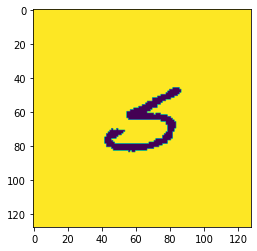

[18.]


In [8]:
plt.imshow(X[0])
plt.show()
print(Y[0])

In [9]:
X = X.reshape(X.shape[0], 128, 128, 1)

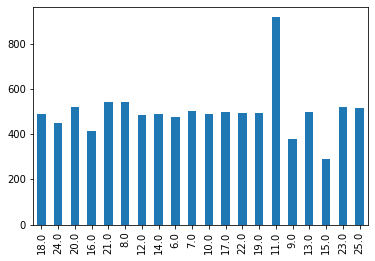

In [10]:
count = pd.value_counts(Y[:,0], sort = False)
count.plot(kind = 'bar')
plt.show()

In [11]:
X = X/255 - 0.5

In [12]:
np.min(X)

-0.5

In [13]:
y = keras.utils.to_categorical(Y, 26)

In [15]:
X_test.shape

(2500, 128, 128, 1)

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [27]:
keras.backend.clear_session()
model = keras.Sequential([
      keras.layers.Conv2D(8, (3,3), input_shape = (128, 128, 1), padding='same'),
      keras.layers.Conv2D(8, (3,3), padding='same'),
      keras.layers.MaxPool2D((2, 2)),
      keras.layers.Dropout(0.25),

      keras.layers.Conv2D(16, (3,3), padding='same'),
      keras.layers.Conv2D(16, (3,3), padding='same'),
      keras.layers.MaxPool2D((2, 2)),
      keras.layers.Dropout(0.25),

      keras.layers.Conv2D(32, (3,3), padding='same'),
      keras.layers.Conv2D(32, (3,3), padding='same'),
      keras.layers.MaxPool2D((2, 2)),
      keras.layers.Dropout(0.25),

      keras.layers.Flatten(),

      keras.layers.Dense(512, activation = "relu"),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(0.5),

      keras.layers.Dense(26, activation = "sigmoid")
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0

In [29]:
optimizer = keras.optimizers.Adam()
model.compile(
    optimizer = optimizer,
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

In [30]:
history = model.fit(X_train, y_train, batch_size = 1000, epochs = 100, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 3s 404ms/step - loss: 2.9449 - accuracy: 0.2773 - val_loss: 2.7498 - val_accuracy: 0.2580
Epoch 2/100
8/8 [==============================] - 3s 392ms/step - loss: 2.5628 - accuracy: 0.5280 - val_loss: 2.4301 - val_accuracy: 0.3432
Epoch 3/100
8/8 [==============================] - 3s 393ms/step - loss: 2.4266 - accuracy: 0.5416 - val_loss: 2.2507 - val_accuracy: 0.3376
Epoch 4/100
8/8 [==============================] - 3s 393ms/step - loss: 2.2994 - accuracy: 0.5120 - val_loss: 2.1916 - val_accuracy: 0.3664
Epoch 5/100
8/8 [==============================] - 3s 399ms/step - loss: 2.1636 - accuracy: 0.4916 - val_loss: 2.1896 - val_accuracy: 0.3884
Epoch 6/100
8/8 [==============================] - 3s 400ms/step - loss: 2.0058 - accuracy: 0.4872 - val_loss: 2.1979 - val_accuracy: 0.3988
Epoch 7/100
8/8 [==============================] - 3s 397ms/step - loss: 1.8361 - accuracy: 0.5361 - val_loss: 1.7638 - val_accuracy: 0.4776
Epoch 8/100
8

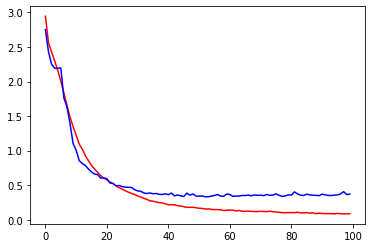

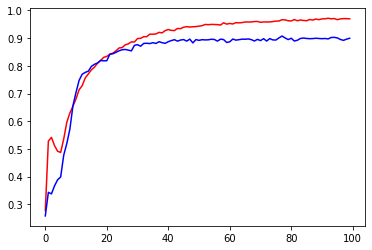

In [31]:
plt.plot(history.history['loss'], color = "red")
plt.plot(history.history['val_loss'], color = "blue")

plt.show()
plt.plot(history.history['accuracy'], color ="red")
plt.plot(history.history['val_accuracy'], color ="blue")

plt.show()

In [32]:
model.save_weights("model.h5")